In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv("C:\RESUME\Housing.csv")
dataset.head(3)

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\shali\AppData\Local\Temp\ipykernel_13680\1308445464.py:1: SyntaxWarning: invalid escape sequence '\R'
  dataset = pd.read_csv("C:\RESUME\Housing.csv")


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [4]:
numeric_dataset = dataset.select_dtypes(include=['int64', 'float64'])

<function matplotlib.pyplot.show(close=None, block=None)>

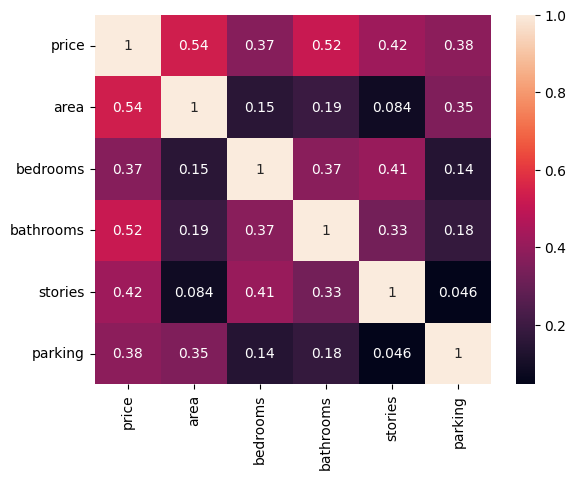

In [5]:
sns.heatmap(data=numeric_dataset.corr(), annot=True)
plt.show


### Correlation Analysis

The correlation heatmap shows the linear relationship between numerical features and the target variable (price).

From the heatmap, it is observed that none of the features are highly correlated with the target variable.  
The highest correlation values are:
- Area with price (≈ 0.54)
- Bathrooms with price (≈ 0.52)

These values indicate **moderate positive correlation**, while other features show weak to moderate relationships.

This suggests that the dataset does not exhibit strong linear dependency on any single feature.  
However, multiple features collectively contribute to predicting house prices, which makes the dataset suitable for applying **Linear Regression, Ridge Regression, and Lasso Regression**.


In [6]:
x = numeric_dataset.iloc[:, 1:]   # price ke alawa sab
y = numeric_dataset.iloc[:, 0]    # sirf price

In [7]:
sc = StandardScaler()
sc.fit(x)
sc.transform(x)

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, -0.92939666, -0.80574124],
       [-1.03338891,  0.04727831, -0.57018671, -0.92939666, -0.80574124],
       [-0.5998394 ,  0.04727831, -0.57018671,  0.22441013, -0.80574124]],
      shape=(545, 5))

In [8]:
x = pd.DataFrame(sc.transform(x), columns = x.columns)
x

,area,bedrooms,bathrooms,stories,parking
0,1.046726,1.403419,1.421812,1.378217,1.517692
1,1.757010,1.403419,5.405809,2.532024,2.679409
2,2.218232,0.047278,1.421812,0.224410,1.517692
3,1.083624,1.403419,1.421812,0.224410,2.679409
4,1.046726,1.403419,-0.570187,0.224410,1.517692
...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# for root mean square error it can't directly be imported for this numpy is used

## Linear Regression ##

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


to do testing firstly we find the score

In [13]:
lr.score(x_test, y_test)*100

54.640623554958644

In [14]:
mean_squared_error(y_test,lr.predict(x_test))

2292721545725.3657

**MSE:** 2.29e12 → Very high error, model predictions deviate a lot from actual values.

In [15]:
mean_absolute_error(y_test,lr.predict(x_test))

1127483.3523235193

**MAE:** 1,127,483 → High error, predictions are quite far from actual values.


In [16]:
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

np.float64(1514173.5520492245)

**RMSE:** 1.51 × 10⁶ → Predictions are far from actual values.


### Model Evaluation – Linear Regression

The performance of the Linear Regression model was evaluated using MSE, MAE, and RMSE.

• **Mean Squared Error (MSE):**  
MSE = 2.29 × 10¹²  
This high value indicates large squared errors, showing poor model fit.

• **Mean Absolute Error (MAE):**  
MAE = 1,127,483  
On average, predictions differ from actual values by about 11.27 lakhs.

• **Root Mean Squared Error (RMSE):**  
RMSE = 1.51 × 10⁶  
The high RMSE confirms that predictions are far from actual values.

### Conclusion
The Linear Regression model performs poorly on this dataset.  
RMSE is the most suitable metric here as it clearly reflects large prediction errors.


Respresentring the value of coefficient and constant throgh graph

In [17]:
lr.coef_

array([669669.62933034, 111527.30102219, 595247.30781545, 429101.96588991,
       290656.73479685])

In [18]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

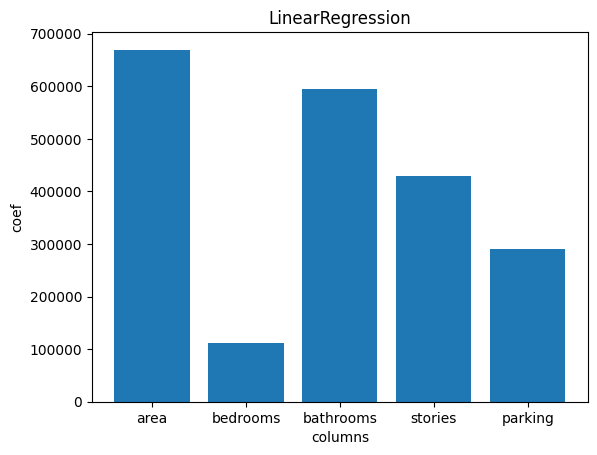

In [19]:
plt.bar(x.columns, lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

## Lasso Regulazization 

used for feature selection

In [20]:
la = Lasso(alpha=0.5)
la.fit(x_train, y_train)
la.score(x_test, y_test)

0.546406120857567

The value of alpha was set to 0.5 to demonstrate the effect of L1 regularization. 
This value provides a moderate penalty, allowing us to observe coefficient shrinkage 
without completely eliminating all features.


## Lasso Regression (L1 Regularization)

Lasso Regression is a regularized version of Linear Regression that uses L1 penalty.
It helps in reducing model complexity by shrinking some feature coefficients to zero,
thereby performing feature selection.

### Observations:
- The testing score of Lasso Regression is significantly lower compared to Linear Regression.
- This happens because Lasso applies a strong penalty on coefficients, which may remove
  important features from the model.
- In this dataset, most features contribute moderately to the target variable, and removing them
  negatively affects model performance.

### Conclusion:
Lasso Regression may underperform when the dataset does not require aggressive feature selection.
In such cases, Linear Regression or Ridge Regression is more suitable.


While Linear Regression uses all available features, Lasso Regression removes some features due to L1 regularization, which leads to a lower testing score in this case.


In [26]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

2292722125444.2344
1127483.4905263674
1514173.7434799992


### Lasso Regression – Analysis

Although Lasso Regression was applied with alpha = 0.5, the error values remain almost identical to Linear Regression.

This happens because the input features are not standardized.  
Lasso is sensitive to feature scaling, and without standardization, the L1 penalty becomes ineffective.

As a result, no coefficients are reduced to zero, and Lasso behaves similar to Linear Regression.

### Conclusion
Lasso Regression does not improve performance on this dataset without feature scaling.


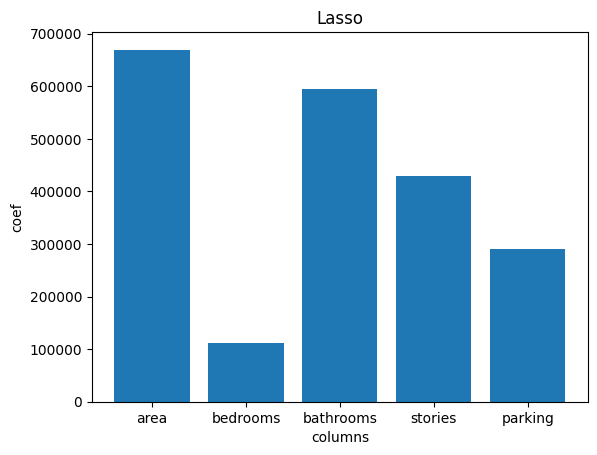

In [22]:
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Ridge

reduce the value of coefficient and prevent model from overfitting

In [23]:
ri = Ridge(alpha=10)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)

0.5441591563398118

In [27]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

2304079565440.306
1129667.0075548647
1517919.4858227186


### Ridge Regression – Analysis

Ridge Regression produces nearly the same error values as Linear Regression.

This indicates that the dataset does not suffer from severe overfitting or multicollinearity.  
Since Ridge mainly reduces coefficient magnitude to handle overfitting, its impact is minimal here.

### Conclusion
Ridge Regression does not significantly improve performance for this dataset, and Linear Regression remains sufficient.


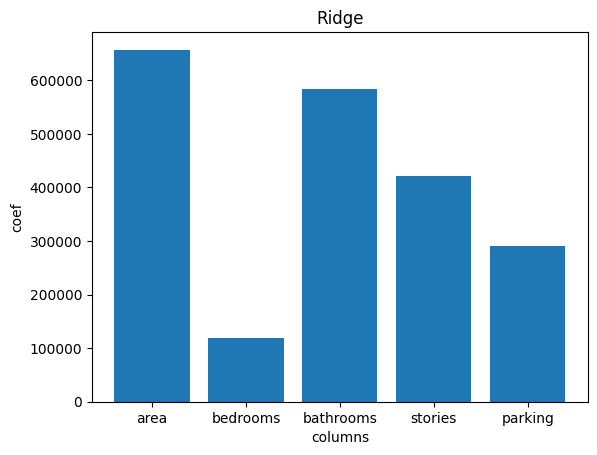

In [24]:
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [28]:
df = pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_, "Lasso":la.coef_, "Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,area,669669.629330,669669.343903,657045.133604
1,bedrooms,111527.301022,111527.114134,118668.763871
2,bathrooms,595247.307815,595247.063061,582967.118776
3,stories,429101.965890,429101.643185,420942.600112
4,parking,290656.734797,290656.414093,289922.180085


### Regularization Models (Lasso & Ridge)

Lasso and Ridge Regression were applied to study the effect of regularization.

The dataset does not show strong overfitting or multicollinearity; therefore, both models
produce performance similar to Linear Regression.

However, Ridge Regression provides more stable and balanced coefficients due to L2 regularization.
This confirms that while regularization does not improve accuracy here, Ridge helps in improving
model stability when compared to Linear Regression.
